In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
import pydot

A primeira coisa que vamos fazer é ler o conjunto de dados usando a função read_csv() dos Pandas.
Colocaremos esses dados em um DataFrame do Pandas, chamado "titanic", e nomearemos cada uma das colunas.

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


VARIABLE DESCRIPTIONS:
<ol>
<li>Survived - Survival (0 = No; 1 = Yes);</li>
<li>Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd);</li>
<li>Name - Name;</li>
<li>Sex - Sex;</li>
<li>Age - Age;</li>
<li>SibSp - Number of Siblings/Spouses Aboard;</li>
<li>Parch - Number of Parents/Children Aboard;</li>
<li>Ticket - Ticket Number;</li>
<li>Fare - Passenger Fare (British pound);</li>
<li>Cabin - Cabin;</li>
<li>Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton);</li>
</ol>

Como estamos construindo um modelo para prever a sobrevivência de passageiros do Titanic, nosso alvo será a variável "Survived" do dataframe titanic.
Para ter certeza de que é uma variável binária, vamos usar a função countplot() do Seaborn.



```
# Isto está formatado como código
```

Como estamos construindo um modelo para prever a sobrevivência de passageiros do Titanic, nosso alvo será a variável "Survived" do dataframe titanic.
Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.

<ipython-input-3-2866407bf8bb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Survived',data=titanic, palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

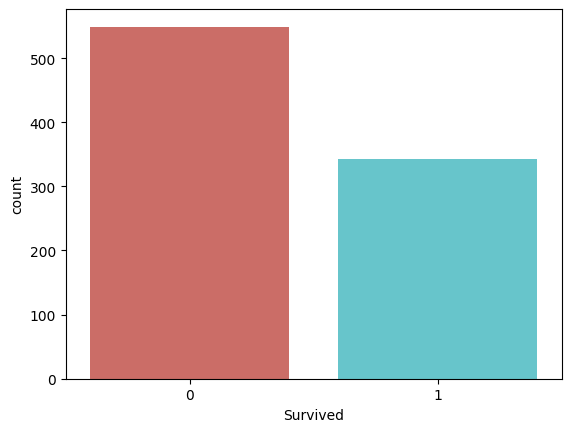

In [3]:
sb.countplot(x='Survived',data=titanic, palette='hls')

### Checking for missing values
É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True para o teste, ou seja, quantidade de valores nulos nas variaveis

In [4]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ok, então existem 891 linhas no dataframe. Cabin é quase todo composto por missing values, então podemos eliminar essa característica! Mas e quanto à idade? A age parece um preditor relevante para a sobrevivência, certo? Nós queremos manter as variáveis, mas tem 177 missing values. Precisamos encontrar uma maneira de nos aproximarmos desses valores em falta!

E quanto ao nome de uma pessoa, número do bilhete e número de identificação do passageiro? Eles são irrelavantes para prever a capacidade de sobrevivência. E, como você se lembra, a variável cabine é quase todoa com missing values!!

In [6]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


Agora, o dataframe foi reduzido para apenas variáveis relevantes, mas agora precisamos lidar com os valores ausentes na variável age.

### Imputing missing values
Vejamos como a idade do passageiro está relacionada à sua classe como passageiro no barco.

<ipython-input-7-faf9135523a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')


<Axes: xlabel='Pclass', ylabel='Age'>

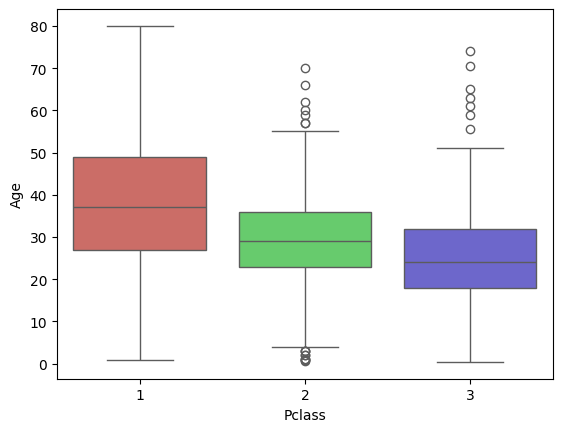

In [7]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

Falando mais ou menos, poderíamos dizer que quanto mais jovem é um passageiro, mais provável é que ele esteja na 3ª classe. Quanto mais velho for um passageiro, maior a probabilidade de estarem na 1ª classe. Portanto, há um relacionamento frouxo entre essas variáveis. Então, vamos escrever uma função que se aproxime da idade dos passageiros, com base em sua classe. Na caixa, parece que a idade média dos passageiros de 1ª classe é de cerca de 37 anos, os passageiros de 2ª classe são 29 e os passageiros de 3ª classe são 24.

Então, vamos escrever uma função que encontre cada valor nulo na variável Age e, para cada nulo, verifique o valor da Pclass e atribua um valor de idade de acordo com a idade média dos passageiros nessa classe.

In [9]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Após definir a função, vamos executar apenas para os valores nulos de Age

In [ ]:
titanic_data[['Age', 'Pclass']]

In [ ]:
titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)

In [10]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

<ipython-input-9-54c79eab88c7>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-9-54c79eab88c7>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


Existem ainda 2 valores nulos na variável Embarked. Podemos eliminar esses dois registros sem perder muitas informações importantes do nosso conjunto de dados, então faremos isso.

In [11]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
titanic_data.head()

Convertendo variaveis categóricas com one-hot-enconding (via pandas usa-se a função get_dummies)
![Exemplo de One Hoting Encoding](https://telescopeinstorage.blob.core.windows.net/datasets/onehotencoding.jpg)

In [ ]:
aux = pd.get_dummies(titanic_data['Sex'],drop_first=False)
aux.head()

In [12]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
0,True
1,False
2,False
3,False
4,True


In [13]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head(10)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
5,True,False
6,False,True
7,False,True
8,False,True
9,False,False


In [14]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
titanic_dmy.info()

Agora temos um conjunto de dados com todas as variáveis no formato correto!
### Validando independencia entre as variáveis

<Axes: >

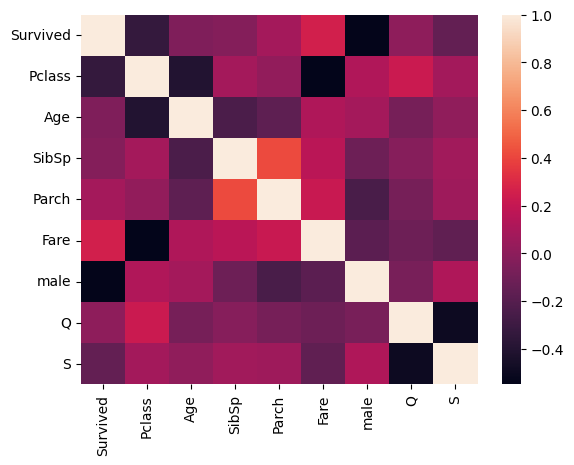

In [16]:
sb.heatmap(titanic_dmy.corr())

Fare e Pclass não sao independentes uma com a outra, entao vamos excluí-las.

In [17]:
titanic_dmy.drop(['Pclass'],axis=1,inplace=True)
titanic_dmy.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,1,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,0,35.0,0,0,8.0500,True,False,True


### Agora Vamos Classificar!

1º: Separar o conjunto em variavel resposta e características de treinamento

In [18]:
X = titanic_dmy.iloc[:,[1,2,3,4,5,6,7]].values
y = titanic_dmy.iloc[:,0].values

In [19]:
X.shape

(889, 7)

In [ ]:
X

In [ ]:
len(y)

In [ ]:
y

Normalização do Conjunto

In [20]:
X = StandardScaler().fit_transform(X)

In [ ]:
X

Agora dividir em treino e teste (teste com 30%)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#scaler =  StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(622, 7)

In [23]:
X_test.shape

(267, 7)

### Modelo de RNA

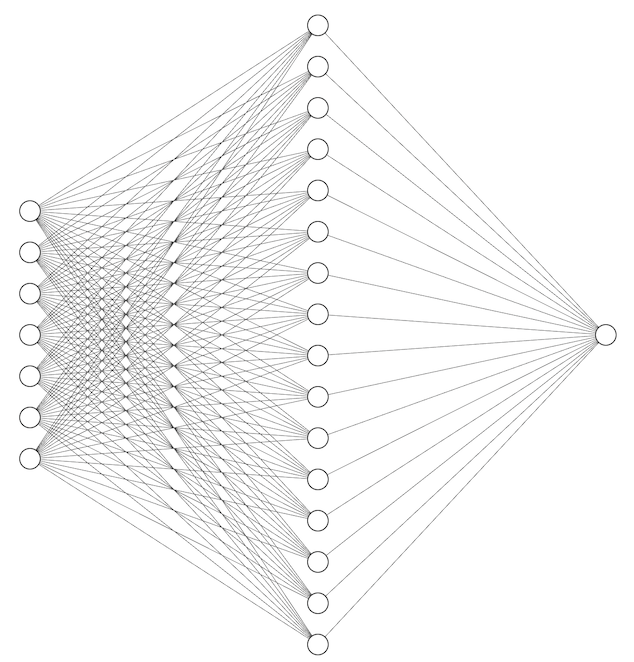

In [24]:
model = Sequential()
model.add(Dense(16,input_dim=7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compila do modelo para certificar que está correto utilizando a função de perda binary_crossentropy, gradiente adam e monitorará a acurácia ao longo do processo de treinamento:

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Apresenta a configuração da rede:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

None


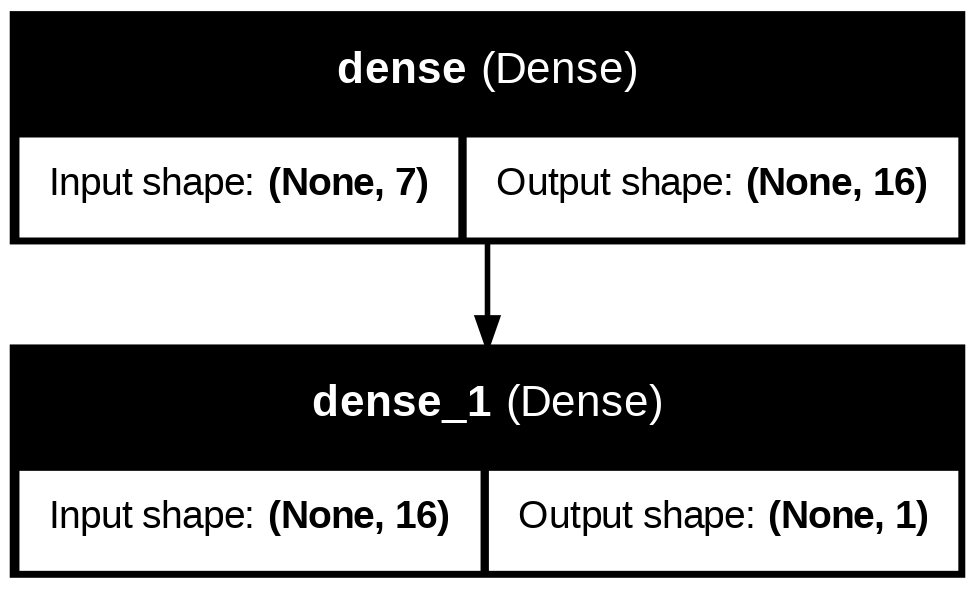

In [26]:
print(model.summary())

plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)

Realiza o treinamento com 100 épocas e o tamanho do batch igual a 10, lembrando que a cada batch o processo de calibragem dos neurônios é realizado novamente (backpropagation). Uma época termina quando todas as amostras de treinamento passam pela rede.

In [27]:
history  = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6065 - loss: 0.6719
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.5770
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.5248
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8091 - loss: 0.4945
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4686
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.4459
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4619
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4375
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4576
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4614
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4405
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Faz a plotagem a acurácia de treinamento ao longo das épocas

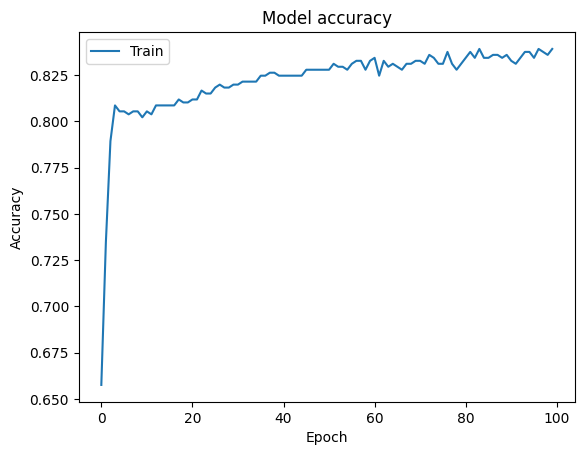

In [28]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


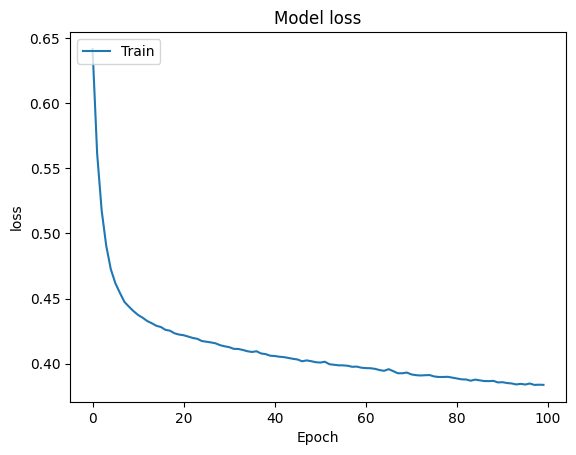

In [29]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Realiza as predições do conjunto de teste obtendo a saída real (numérica) do Neurônio

In [30]:
y_pred_out  = model.predict(X_test)
print(y_pred_out)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.97968894]
 [0.7684614 ]
 [0.05547084]
 [0.79364586]
 [0.12379979]
 [0.16736025]
 [0.7623853 ]
 [0.6841399 ]
 [0.32551008]
 [0.08281394]
 [0.08324018]
 [0.2574191 ]
 [0.6405406 ]
 [0.2574191 ]
 [0.8439194 ]
 [0.10743561]
 [0.05293963]
 [0.11683489]
 [0.47668427]
 [0.76019025]
 [0.08043037]
 [0.6272064 ]
 [0.13972986]
 [0.05534704]
 [0.06877252]
 [0.93344873]
 [0.0571417 ]
 [0.12854855]
 [0.08791383]
 [0.08337144]
 [0.9206976 ]
 [0.10121704]
 [0.09069304]
 [0.08281939]
 [0.41966528]
 [0.08645528]
 [0.00463139]
 [0.20988142]
 [0.9876203 ]
 [0.6720211 ]
 [0.90500236]
 [0.6815703 ]
 [0.9748564 ]
 [0.60412496]
 [0.1988863 ]
 [0.7489133 ]
 [0.9317023 ]
 [0.79886466]
 [0.79318386]
 [0.10500328]
 [0.9634123 ]
 [0.9600619 ]
 [0.64168745]
 [0.5833805 ]
 [0.6629009 ]
 [0.84671324]
 [0.2965747 ]
 [0.09674755]
 [0.17327897]
 [0.08691416]
 [0.98375976]
 [0.11683489]
 [0.21739456]
 [0.29387704]
 [0.10558645]
 [0.10631198]
 [0.05306309]
 [0.73523694]
 [0.680834

Realiza as predições do conjunto de teste obtendo a classe do problema:

In [ ]:
y_test

In [31]:
y_pred_classes = (y_pred_out > 0.5).astype(int)
y_pred_classes


array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
y_test

Avalia o modelo sob o ponto de vista da acurácia no conjunto de teste:

In [32]:
scores = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % ('Accuracy', scores[1]*100))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7713 - loss: 0.5218

Accuracy: 79.78%


In [33]:
scores

[0.4754922688007355, 0.7977527976036072]